# Introduction
.
.
.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("../data/Womens Clothing E-Commerce Reviews.csv",sep=",",index_col="Unnamed: 0")
df_backup = df.copy()

### Understanding Database

In [3]:
'''
In this data set, there are around 250.000 records.

- There are less than hundred missing values for columns Division Name, Department Name and 
Class Name. Since this percentage is so low compared to whole dataset, I will exclude those
data for further analysis.

- I will exclude ages above 80 from the dataset in order to normalize data.

- Average age in our dataset is 43.
'''

print(f"Null Columns;\n{df.isnull().sum()}")
print("\n")
print(df.info())

Null Columns;
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Departm

### Data Cleaning and Wrangling

In [4]:
# Function to remove NaN values
def drop_missing_values(data,column):
    if data[column].isnull().sum() > 0:
        data = data[data[column].isnull() != True]
    else:
        pass
    return data

nan_columns = ["Division Name","Department Name","Class Name"]
for column in nan_columns:
    df = drop_missing_values(df,column)

In [5]:
# Removing records for ages under 18 and over 80.
df = df.drop(df[(df["Age"] > 80) | (df["Age"] < 18)].index)

In [6]:
# Creating a new column for binning age
interval = [18,30,40,50,60,70,80]
age_categorized = pd.cut(df["Age"],bins=interval,retbins=False,
                         include_lowest=True,
                         labels=["18-30","30-40","40-50","50-60","60-70","70-80"])
df.insert(2,"Age_Categorized",age_categorized)

### Data Analysis

Text(0.5, 1.0, 'Correlation Heatmap of Dataset')

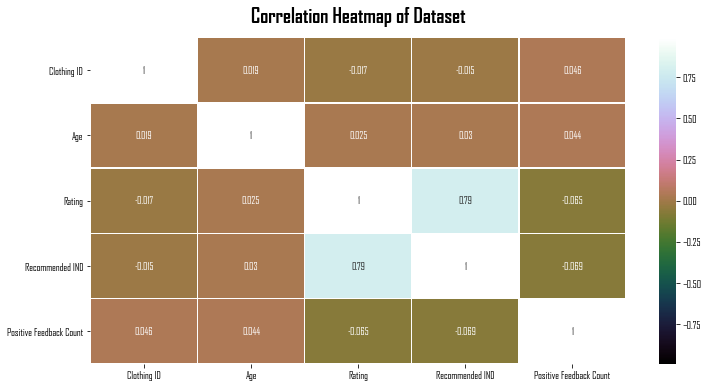

In [7]:
'''
Checking correlations with Heatmap.

Results;
- There is a strong positive correlation between rating and recommendation indicator.
'''
plt.rcParams["font.family"] = "agency fb"
plt.rcParams["figure.figsize"] = (12,6)

sns.heatmap(data=df.corr(), vmin=-0.99,vmax=0.99,
            annot= True, cbar=True,linewidth=0.5, cmap="cubehelix")
plt.yticks(rotation=0)
plt.title("Correlation Heatmap of Dataset",size=20,fontweight="bold",pad=15)

Text(0.5, 1.0, 'Number of reviews per age')

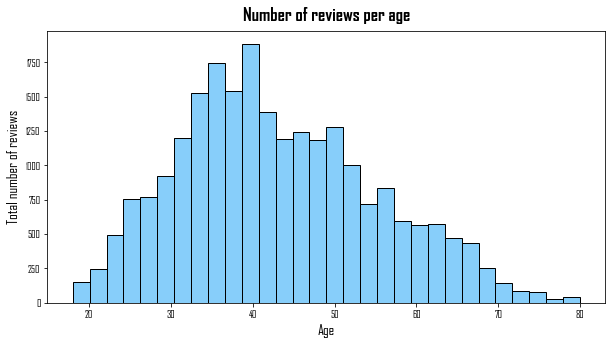

In [8]:
'''
Looking number of reviews per age.

Results;

- People with ages between 25-55 are the most reviewing group.
- Average age of people in our dataset is 43. 
'''

plt.rcParams["font.family"] = "agency fb"
plt.rcParams["figure.figsize"] = (10,5)

fig1, ax = plt.subplots(1,1)
ax.hist(df.Age, bins=30,color="lightskyblue",edgecolor="k")
ax.set_xlabel("Age",size=15)
ax.set_ylabel("Total number of reviews",size=15)
ax.set_title("Number of reviews per age",size=18,fontweight="bold",pad=10)

Text(0.5, 1.0, 'Number of ratings per age')

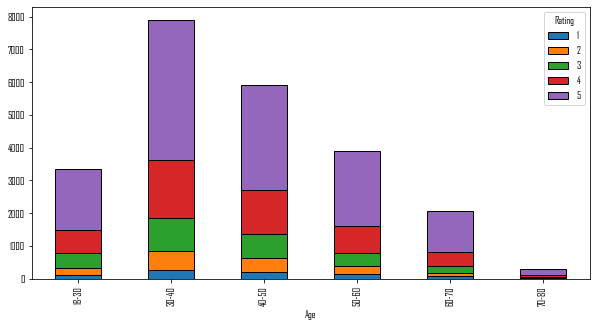

In [9]:
'''
Looking number of ratings per age group.

Results;
- People with ages more than 70 does not involve much for rating.
- People age in between 30-50 have involved more into rating compared to 
other groups(positive/negative)

'''

plt.rcParams["font.family"] = "agency fb"
plt.rcParams["figure.figsize"] = (10,5)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
df.groupby(['Rating', age_categorized]).size().unstack(0).plot.bar(ax=ax2,stacked=True,edgecolor="k")
ax.set_xlabel("Age",size=15)
ax.set_ylabel("Total number of ratings",size=15)
ax.set_title("Number of ratings per age",size=18,fontweight="bold",pad=10)

In [10]:
'''
Checking percentages of 5 ratings and 1 ratings for poeple in the interval of 30-40 and 40-50 
since they are the most involved group in ratings.

Results;

- People in age between 30-40 have the highest percentage of giving 5 stars with percentage of 18.38%
- People in age between 40-50 have the second highest percentage of giving 5 stars with 
percentage of 13.67%

- People in age between 30-40 have the highest percentage of giving 1 stars with percentage of 1.19%
- People in age between 40-50 have the second highest percentage of giving 1 stars with
percentage of 0.89%

'''

five_ratio_list = []
one_ratio_list = []
labels=["18-30","30-40","40-50","50-60","60-70","70-80"]
def ratio_calculator(data):
    for i in range(0,len(labels)):
            five_ratio_list.append((len(data[(data["Age_Categorized"] == labels[i]) & 
                               (data["Rating"] == 5)]) / len(data))*100)
    for i in range(0,len(labels)):
            one_ratio_list.append((len(data[(data["Age_Categorized"] == labels[i]) & 
                               (data["Rating"] == 1)]) / len(data))*100)

ratio_calculator(df)
list_of_five = list(zip(five_ratio_list, labels))
list_of_one = list(zip(one_ratio_list, labels))
print("5 star percentages")
print('\n'.join(map(str, list_of_five)))
print("\n")
print("1 star percentages")
print('\n'.join(map(str, list_of_one)))

5 star percentages
(7.940786377444059, '18-30')
(18.38018226158388, '30-40')
(13.673897231848715, '40-50')
(9.754845334360159, '50-60')
(5.356608052025842, '60-70')
(0.697385872588029, '70-80')


1 star percentages
(0.48774226671800797, '18-30')
(1.1979634621144055, '30-40')
(0.8941941556496812, '40-50')
(0.6374876994823087, '50-60')
(0.32088307020921575, '60-70')
(0.04706285029735165, '70-80')


Text(0.5, 1.0, 'Ratings count for each department')

<Figure size 720x360 with 0 Axes>

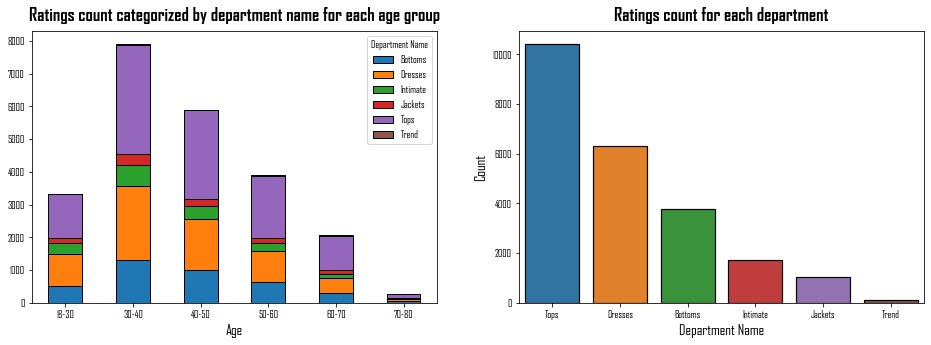

In [41]:
'''
Looking departments for each age group.

Results;
- Tops department has the highest number of ratings which leads that Tops department has the highest
sales proportion compared to others.

- This is also supported by subplot2.

- Dresses department has the second highest sales proportion after tops department. It is followed 
by Bottoms.

Suggestion;

- Apparently, customer likes Tops department the most, this department has to be investigated 
further and findings have to be applied to other departments in order to leverage sales.
'''

fig3 = plt.figure()
fig3 , ax = plt.subplots(1,2,figsize=(16,5))
df.groupby(['Department Name', age_categorized]).size().unstack(0).plot.bar(
    ax=ax[0],stacked=True,edgecolor="k")
ax[0].set_xlabel("Age",size=15)
ax[0].set_title("Ratings count categorized by department name for each age group",size=18,
                fontweight="bold",pad=10)
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=0)

count_each_dpt = pd.pivot_table(df,values=["Class Name"],columns=[
    "Department Name"],aggfunc="count").T.sort_values(by="Class Name",ascending=False)

ax[1] = sns.barplot(data=count_each_dpt.reset_index(), x ="Department Name",
                    y="Class Name",edgecolor="k",linewidth=1.2)
ax[1].set_xlabel("Department Name",size=15)
ax[1].set_ylabel("Count",size=15)
ax[1].set_title("Ratings count for each department",size=18,fontweight="bold",pad=10)